<a href="https://colab.research.google.com/github/PraveenSingh-ML-0728/Regression_Problem/blob/main/Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing The Dependencies

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import  train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics

Importing Boston_Data_Set

In [194]:
house_price_dataset = sklearn.datasets.load_boston()

In [195]:
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [196]:
#Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [197]:
# Print 1st 5 Rows
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [198]:
# Add the target (Price) column to the dataframe
house_price_dataframe['Price'] = house_price_dataset.target

In [199]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [200]:
# Checking the number of rows and column in the DataFrame
house_price_dataframe.shape

(506, 14)

In [201]:
# Check for missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [202]:
# Statistical measure of the Dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the Correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [203]:
correlation = house_price_dataframe.corr()

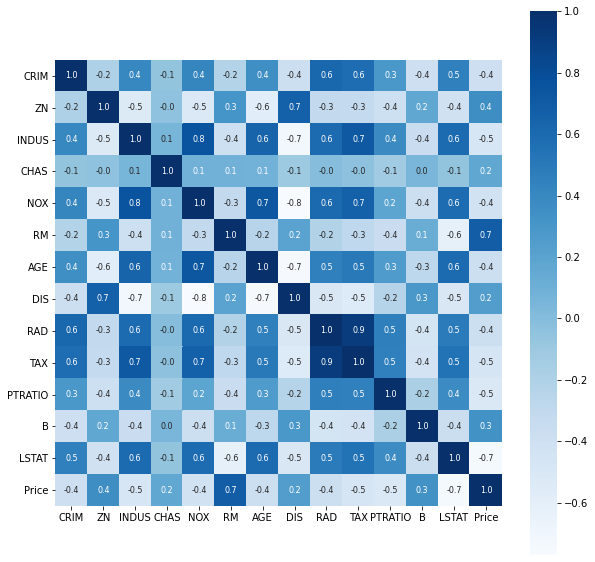

In [204]:
# Constructing a Heatmap to understand the Correlations
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the Data And Target

In [205]:
X= house_price_dataframe.drop(['Price'], axis=1)

Y= house_price_dataframe['Price']

In [206]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

Splitting the Data into Training Data And Test Data

In [207]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2 )

In [208]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

XGBoost Regressor

In [209]:
# Loading The Model
model = XGBRFRegressor()

In [210]:
# Training the model with X_train
model.fit(X_train, Y_train)

[09:45:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

Evaluation


Prediction on Training Data

In [211]:
# Accuracy for Prediction on training Data
training_data_prediction = model.predict(X_train)

In [212]:
print(training_data_prediction)

[24.26097   23.937279  20.795095  34.678898  17.572048  14.097384
 20.537981  16.403696  12.070563  20.26593   15.364628  10.941337
 26.76523   29.387794  32.45916   20.57872   23.951025  20.601912
 33.815083  20.506857  24.623003  11.109909  40.909138  20.645123
 17.505491  20.504509  20.822424  27.183193  20.645123  33.550327
 20.683706  11.11836   20.674335  16.958675  12.095911  11.256641
 13.076128  20.767534  17.01101   15.447571  24.259064  30.94419
 14.228413  16.311405  17.086775  16.693718  24.510582  16.900564
 40.909138  19.273033  20.724445  31.855907  16.715927  24.28798
 20.58119   23.934807  20.58119   32.236374  27.75429   32.13063
 20.63986   38.83841   14.931303  10.566486  24.012209  11.514686
 23.501461  17.51859   20.683706  40.909138  38.35905   33.749577
 23.96692   32.826275  24.248508  40.396328  15.01451   19.20232
 23.930414  24.012209  33.132637  23.979893  24.291822  19.456394
 40.701645  19.374865  33.48482   33.749577  10.3852215 23.744871
 16.850208  12

In [213]:
# R^2 Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R^2 Error :', score_1)

print('Mean Absolute Error :', score_2)

R^2 Error : 0.821063060730745
Mean Absolute Error : 2.640049894257347


Visualizing The Actual Price And Predicted Prices

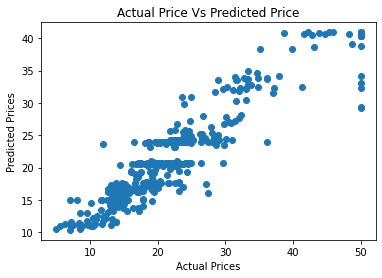

In [214]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price Vs Predicted Price')
plt.show()

Prediction on Test Data

In [215]:
# Accuracy for Prediction on test Data
test_data_prediction = model.predict(X_test)

In [216]:
print(test_data_prediction)

[19.35483  19.7516   34.58816  24.538847 10.999069 15.364654 23.574799
 29.788872 15.057265 19.674623 24.446342 24.088846 23.937279 20.536
 11.180333 23.958597 17.130493 11.783113 10.999069 13.632226 24.30859
 20.538546 33.39814  18.783934 13.763054 20.53353  39.272854 33.851326
 34.116405 23.951025 17.704632 23.934807 29.35503  25.93734  12.983863
 16.008179 12.078683 20.357122 20.752014 20.68163  24.088846 16.836689
 32.73617  10.941337 19.658222 14.001202 34.83526  15.867065 29.0522
 12.748105 29.579948 23.813883 10.941337 32.333626 18.468187 20.506857
 20.735796 17.968208 17.540262 17.757793 17.913319 24.068245 17.87011
 28.998278 29.619457 24.924706 40.909138 23.574799 12.550637 24.012209
 16.804165 10.999069 23.701658 16.218636 23.936447 27.121729 20.382343
 20.688082 20.822424 23.443796 34.14458  17.772764 18.405237 26.98485
 40.701645 33.39814  17.751894 23.989607 30.151299 20.487848 23.937279
 20.599442 11.569439 34.94847  36.034397 11.180333 40.701645 34.750946
 17.913319 16.

In [217]:
# R^2 Error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R^2 Error :', score_1)

print('Mean Absolute Error :', score_2)

R^2 Error : 0.8517048643795635
Mean Absolute Error : 2.8000569960650274


 Predictive Analysis

In [218]:
print('Predicting Price of House are:',training_data_prediction)  # By fitting X_train to our Model it gives predicted Y_train (Predictive price for training Data)


Predicting Price of House are: [24.26097   23.937279  20.795095  34.678898  17.572048  14.097384
 20.537981  16.403696  12.070563  20.26593   15.364628  10.941337
 26.76523   29.387794  32.45916   20.57872   23.951025  20.601912
 33.815083  20.506857  24.623003  11.109909  40.909138  20.645123
 17.505491  20.504509  20.822424  27.183193  20.645123  33.550327
 20.683706  11.11836   20.674335  16.958675  12.095911  11.256641
 13.076128  20.767534  17.01101   15.447571  24.259064  30.94419
 14.228413  16.311405  17.086775  16.693718  24.510582  16.900564
 40.909138  19.273033  20.724445  31.855907  16.715927  24.28798
 20.58119   23.934807  20.58119   32.236374  27.75429   32.13063
 20.63986   38.83841   14.931303  10.566486  24.012209  11.514686
 23.501461  17.51859   20.683706  40.909138  38.35905   33.749577
 23.96692   32.826275  24.248508  40.396328  15.01451   19.20232
 23.930414  24.012209  33.132637  23.979893  24.291822  19.456394
 40.701645  19.374865  33.48482   33.749577  10.3

In [219]:

print('Real Price Value of House',Y_train)  #Actual Boston House Price of Training Data

Real Price Value of House 321    23.1
37     21.0
286    20.1
2      34.7
25     13.9
       ... 
22     15.2
72     22.8
493    21.8
15     19.9
168    23.8
Name: Price, Length: 404, dtype: float64


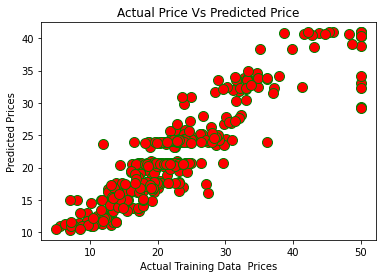

In [220]:
plt.scatter(Y_train, training_data_prediction, edgecolors='g',linewidths=1,s=100, color='red',vmin=1,vmax=100)
plt.xlabel('Actual Training Data  Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price Vs Predicted Price')
plt.show()

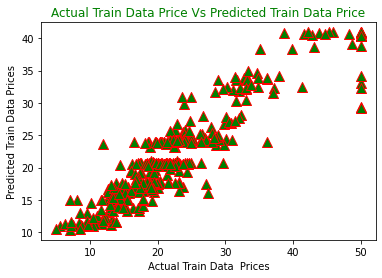

In [221]:
plt.subplot(1,1,1) 
plt.scatter(Y_train,training_data_prediction, edgecolors='r', marker="^",c='g',s=100, linewidths=1)
plt.xlabel('Actual Train Data  Prices')
plt.ylabel('Predicted Train Data Prices')
plt.title('Actual Train Data Price Vs Predicted Train Data Price',c='g')
#plt.grid(True)
plt.show()

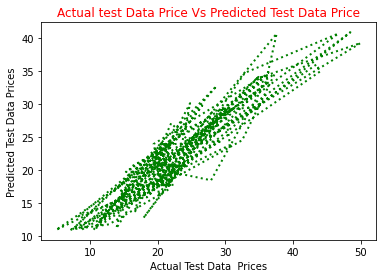

In [222]:
plt.subplot(1,1,1) 
plt.plot(Y_test, test_data_prediction,c='g', linestyle=':', linewidth=2)
#plt.scatter(Y_test,test_data_prediction,linestyle=':', edgecolors='r',c='g',s=80, linewidths=2)
plt.xlabel('Actual Test Data  Prices')
plt.ylabel('Predicted Test Data Prices')
plt.title('Actual test Data Price Vs Predicted Test Data Price',c='r')
#plt.grid(True)
plt.show()